### Import All Necessary Library

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

### Generators

In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\PAPPU\Desktop\cats vs dog\dogvscat\train",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory =r"C:\Users\PAPPU\Desktop\cats vs dog\dogvscat\test",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 500 files belonging to 2 classes.
Found 50 files belonging to 2 classes.


### Normalize the data

In [13]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### Create CNN model

In [19]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
16/16 [==============================] - 306s 16s/step - loss: 8.4037 - accuracy: 0.5220 - val_loss: 3.5608 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 258s 16s/step - loss: 5.0858 - accuracy: 0.6200 - val_loss: 2.0825 - val_accuracy: 0.5200
Epoch 3/10
16/16 [==============================] - 260s 16s/step - loss: 2.8961 - accuracy: 0.6200 - val_loss: 3.3862 - val_accuracy: 0.5800
Epoch 4/10
16/16 [==============================] - 259s 16s/step - loss: 2.1619 - accuracy: 0.7080 - val_loss: 3.4852 - val_accuracy: 0.5800
Epoch 5/10
16/16 [==============================] - 258s 16s/step - loss: 1.6717 - accuracy: 0.7380 - val_loss: 4.8915 - val_accuracy: 0.6400
Epoch 6/10
16/16 [==============================] - 310s 19s/step - loss: 1.5197 - accuracy: 0.7720 - val_loss: 2.0782 - val_accuracy: 0.6600
Epoch 7/10
16/16 [==============================] - 379s 22s/step - loss: 1.3359 - accuracy: 0.7920 - val_loss: 4.4004 - val_accuracy: 0.4800
Epoch 

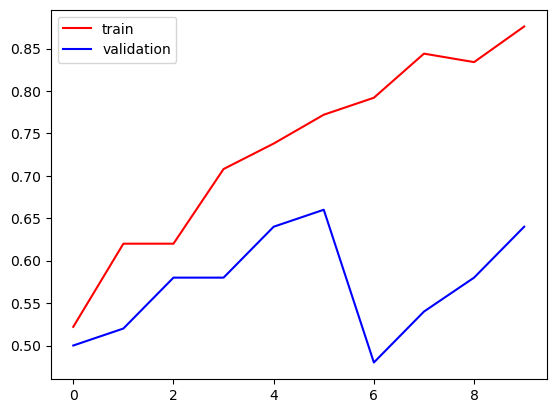

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

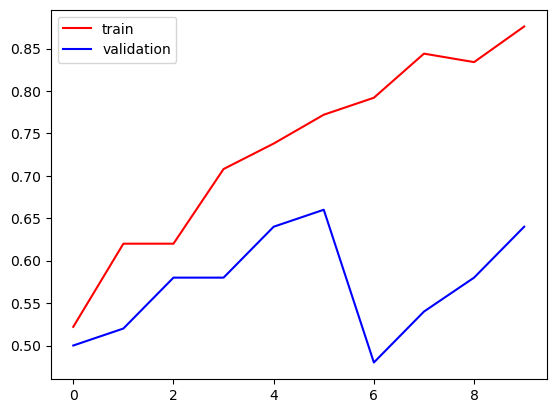

In [24]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

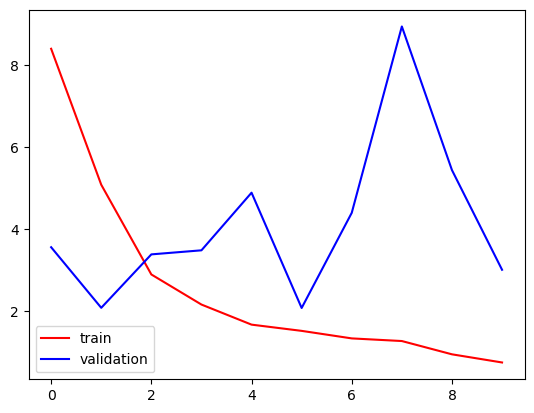

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

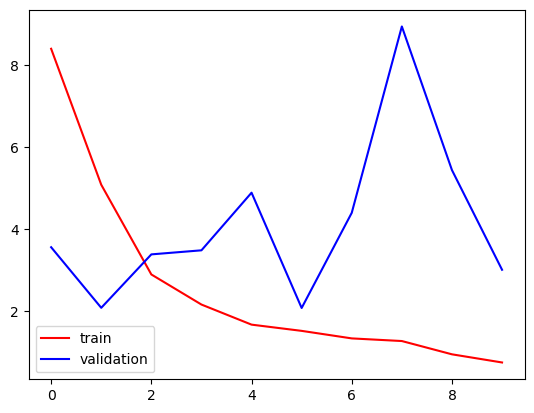

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### Prediction

In [27]:
import cv2

In [28]:
test_img = cv2.imread(r"C:\Users\PAPPU\Desktop\cats vs dog\dogvscat\test\0\250.jpg")

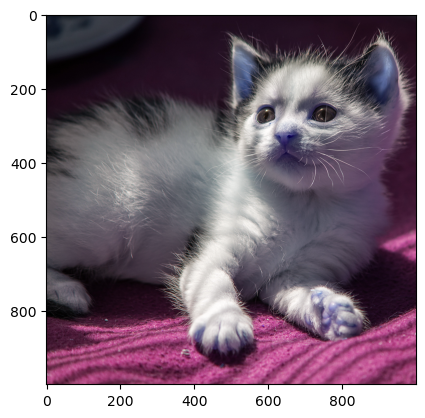

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(1000, 1000, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[1.]], dtype=float32)